In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [ ]:
from sklearn.preprocessing import LabelEncoder
import pickle
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/Drive')

Mounted at /content/Drive


In [ ]:
#nous allons présenter les étapes pour implémentater un modéle de Machine Learning pour la prédiction du champignon
########### Notre modéle va se réaliser en huit étapes ###########
# ÉTAPE 1: LECTURE ET COMPRÉHENSION DES DONNÉES

df = pd.read_csv("/content/Drive/MyDrive/mushroom dataset /mushrooms.csv")
print(df.head())

  class cap-shape cap-surface  ... spore-print-color population habitat
0     p         x           s  ...                 k          s       u
1     e         x           s  ...                 n          n       g
2     e         b           s  ...                 n          n       m
3     p         x           y  ...                 k          s       u
4     e         x           s  ...                 n          a       g

[5 rows x 23 columns]


In [ ]:
#Compter les valeurs de classe pour voir la répartition entre élible et toxique
sizes = df['class'].value_counts(sort = 1)
print(sizes)

e    4208
p    3916
Name: class, dtype: int64


([<matplotlib.patches.Wedge at 0x7ff5195a3f90>,
 [Text(-0.062071904545809166, 1.0982472757380535, ''),
  Text(0.062071904545808784, -1.0982472757380535, '')],
 [Text(-0.03385740247953227, 0.5990439685843927, '51.8%'),
  Text(0.03385740247953206, -0.5990439685843928, '48.2%')])

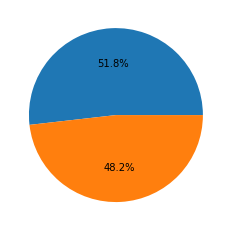

In [ ]:
plt.pie(sizes, autopct='%1.1f%%')
#Bon à savoir pour que nous connaissions la proportion de chaque étiquette

In [ ]:
#étape 1.5
#dans les prochains cas, nous allons explorer nos données
#cette ligne nous montre quelques informations sur notre jeu de données
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   class                     8124 non-null   int64
 1   cap-shape                 8124 non-null   int64
 2   cap-surface               8124 non-null   int64
 3   cap-color                 8124 non-null   int64
 4   bruises                   8124 non-null   int64
 5   odor                      8124 non-null   int64
 6   gill-attachment           8124 non-null   int64
 7   gill-spacing              8124 non-null   int64
 8   gill-size                 8124 non-null   int64
 9   gill-color                8124 non-null   int64
 10  stalk-shape               8124 non-null   int64
 11  stalk-root                8124 non-null   int64
 12  stalk-surface-above-ring  8124 non-null   int64
 13  stalk-surface-below-ring  8124 non-null   int64
 14  stalk-color-above-ring    8124 non-null 

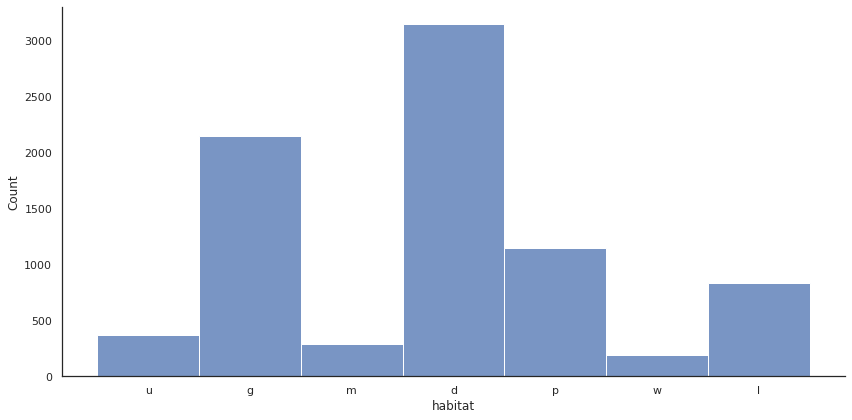

In [ ]:
# Vérifiez la distribution
#vérifier les nombres et les catégories de n'importe quelle classe dans notre ensemble de données
sns.displot(df['habitat'], aspect = 2, height = 6 );

In [ ]:
categorical_df = df.select_dtypes(include = 'object')

In [ ]:
categorical_df = categorical_df.reset_index()

In [ ]:
categorical_df.shape[1]

24

In [ ]:
categorical_df.head()

,index,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [ ]:
categorical_df["index"] = df.index + 1

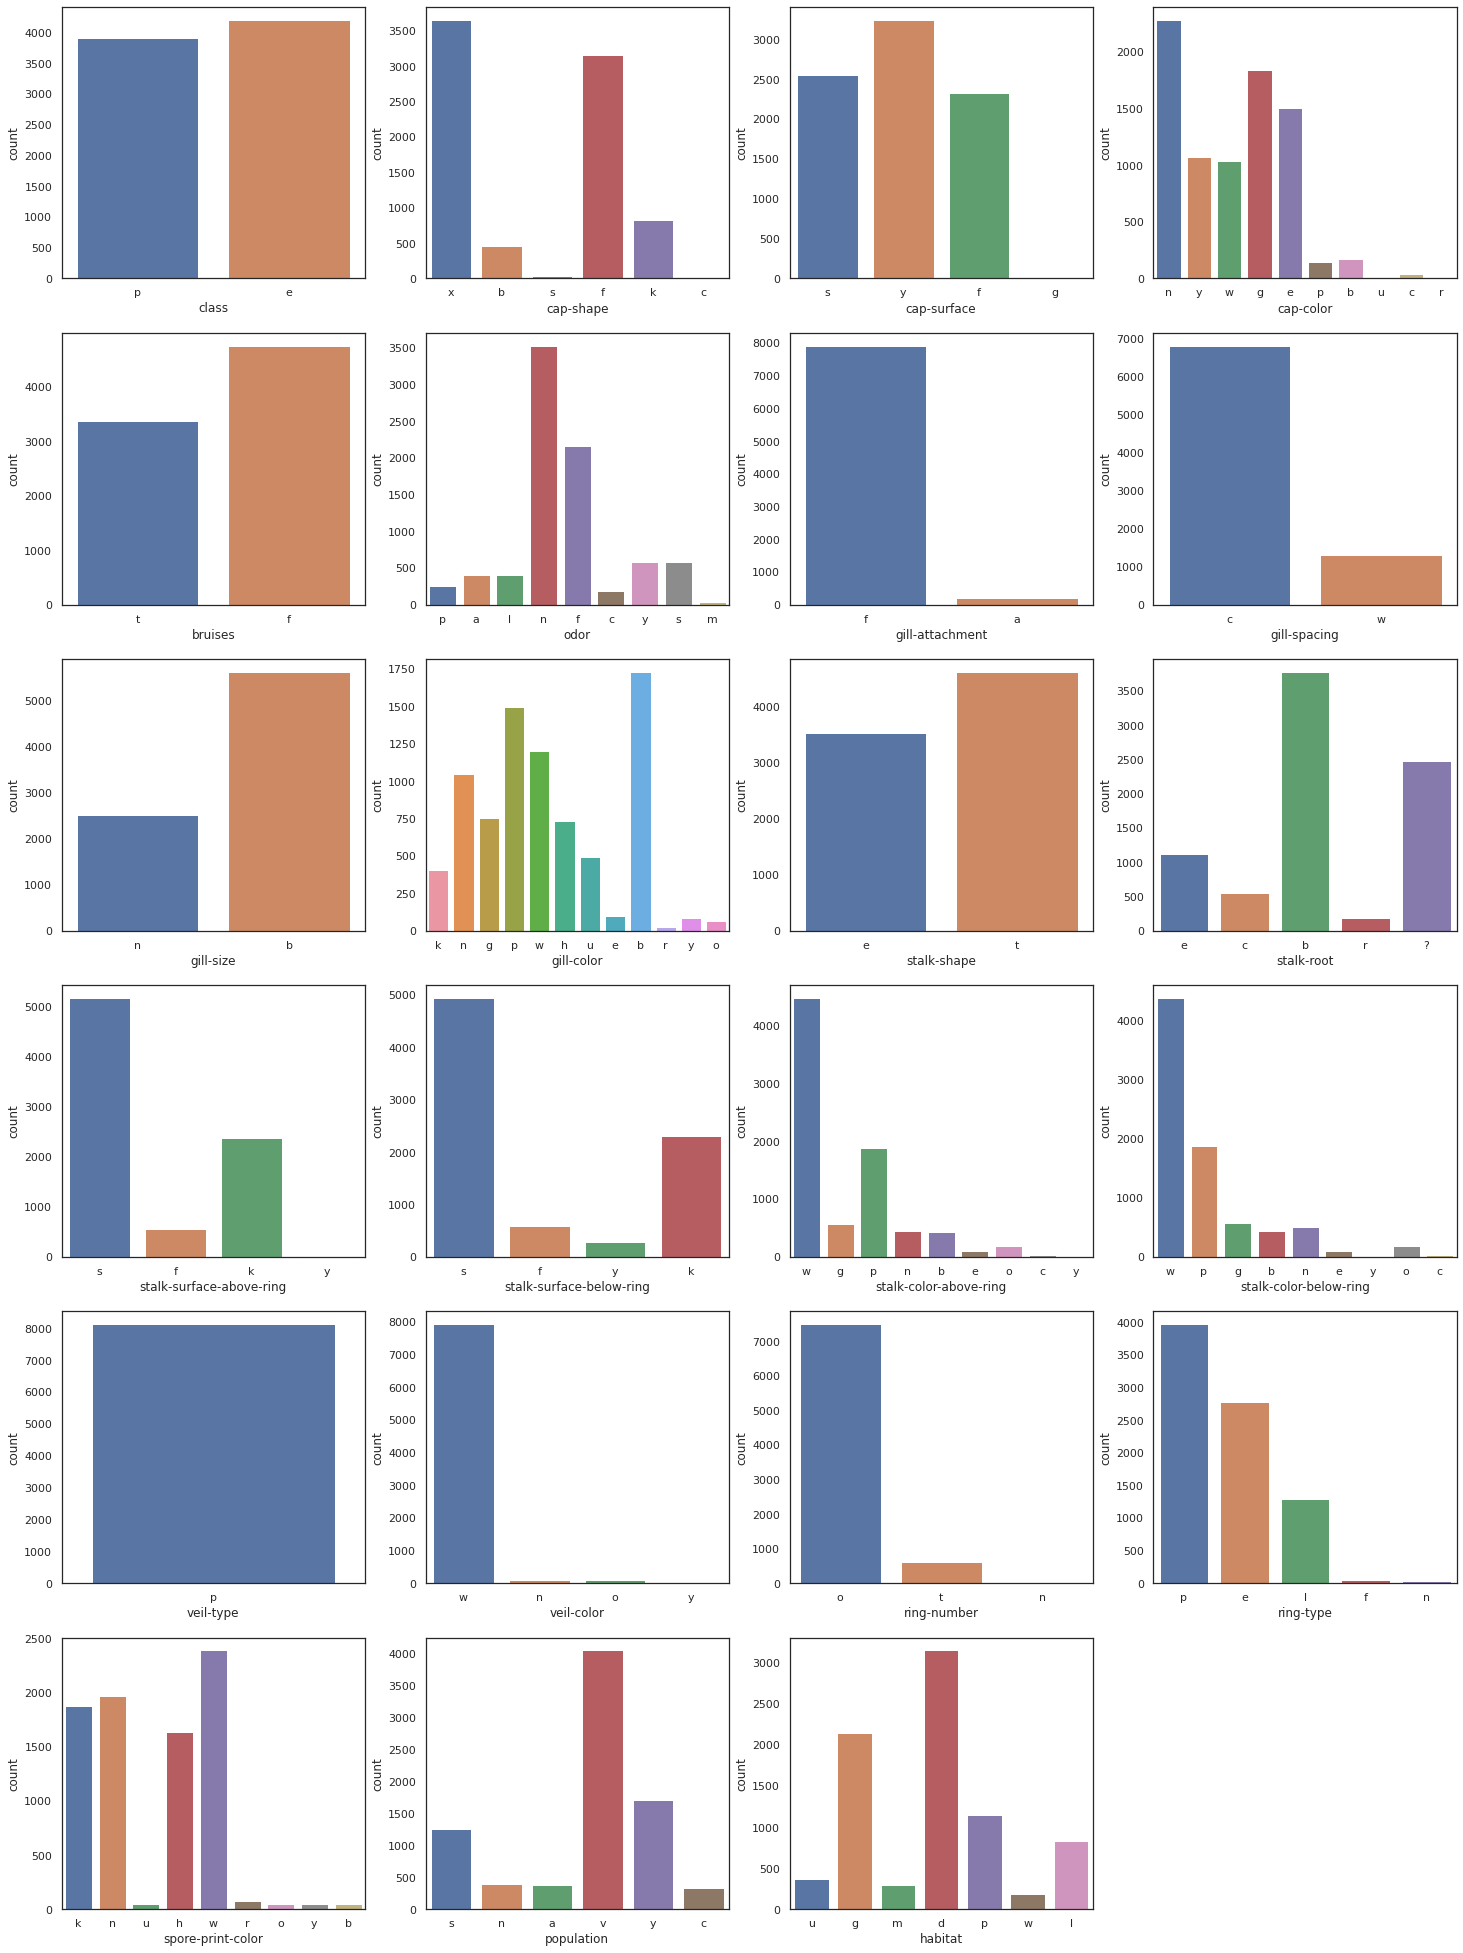

In [ ]:

# Vérifions leur distribution

a = 6 # Nombre de rangées
b = 4 # le nombre de colonnes
c = 1 # initialiser le compteur de tracés

fig = plt.figure(figsize = (25,35))

for i in df: #en cas de nuage de points, utilisez le categorical_df
    if c == 24:
        break
    else:
        plt.subplot(a, b, c)
        
        plt.xlabel(i)
        #si nous voulons afficher le nuage de points, nous devons utiliser une copie indexée de l'ensemble de données qui est categorecal_df
        #sns.scatterplot(x = i, y = "index", data = categorical_df)
        sns.countplot(x = i, data =df) #en cas de nuage de points, utilisez le categorical_df
        c = c + 1
plt.show(fig)

In [ ]:
#ÉTAPE 2: SUPPRIMER LES DONNÉES IRRÉLEVANTES
#NB: le type de voile est une valeur unique mais il y a une possibilité dans le futur d'avoir un autre type de voile
#mais dans ce modèle et cet ensemble de données spécifiques, nous pouvons le supprimer car les colonnes n'ont qu'une valeur unique et cela peut aider notre formation dans quoi que ce soit

df.drop(['veil-type'], axis=1, inplace=True)


In [ ]:
#ÉTAPE 3: gérez les valeurs manquantes, si nécessaire
df = df.dropna()  #Supprimer toutes les lignes avec au moins une valeur nulle.. 


In [ ]:
#ÉTAPE 4: Convertissez le non-numérique en numérique, si nécessaire.
#Parfois, nous pouvons avoir des données non numériques, par exemple le nom du lot, le nom d'utilisateur, le nom de la ville, etc.
#par exemple. si les données sont sous la forme OUI et NON, convertissez-les en 1 et 2
#df.columnname[df.columnname == 'yes'] = 1
#df.columnname[df.columnname == 'no'] = 2


In [ ]:
#aune autre façon de convertir des données non numériques en daa numérique est d'utiliser LbelEncoder
label_encoder_data =df
label_encoder = LabelEncoder()
for col in df.columns:
    label_encoder_data[col] = label_encoder.fit_transform(label_encoder_data[col])
    
df = label_encoder_data

In [ ]:
print(df)

      class  cap-shape  cap-surface  ...  spore-print-color  population  habitat
0         1          5            2  ...                  2           3        5
1         0          5            2  ...                  3           2        1
2         0          0            2  ...                  3           2        3
3         1          5            3  ...                  2           3        5
4         0          5            2  ...                  3           0        1
...     ...        ...          ...  ...                ...         ...      ...
8119      0          3            2  ...                  0           1        2
8120      0          5            2  ...                  0           4        2
8121      0          2            2  ...                  0           1        2
8122      1          3            3  ...                  7           4        2
8123      0          5            2  ...                  4           1        2

[8124 rows x 22 columns]


In [ ]:
#x est les colonnes ou fonctionnalités d'entraînement et y est la cible
X = df.drop("class", axis = 1)
Y = df['class']

In [ ]:
#diviser les données en données de train et de test

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42,shuffle = True)
#random_state peut être n'importe quel entier et il est utilisé comme une graine pour diviser au hasard l'ensemble de données.
#En faisant cela, nous travaillons avec le même jeu de données de test à chaque fois, si cela est important.
#random_state = None divise l'ensemble de données au hasard à chaque fois

In [ ]:
#ÉTAPE 7: Définition du modèle et formation.
# Importez le modèle que nous utilisons
# Instancier un modèle avec 10 arbres de décision
model = RandomForestClassifier(n_estimators = 10, random_state = 25)
# Former le modèle sur les données d'entraînement
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=25, verbose=0,
                       warm_start=False)

In [ ]:
# ÉTAPE 8: TESTER LE MODÈLE EN PRÉVISANT SUR LES DONNÉES DE TEST
# ET CALCULEZ LE SCORE DE PRÉCISION
prediction_test = model.predict(X_test)

In [ ]:
#Imprimer la précision de la prédiction
print ("Accuracy = ", metrics.accuracy_score(y_test, prediction_test))

Accuracy =  1.0


In [ ]:
#Imprimer le score f1 de prédiction
print ("F1-Score = ", metrics.f1_score(y_test, prediction_test))

F1-Score =  1.0


In [ ]:
#Une caractéristique étonnante de la forêt aléatoire est qu'elle nous fournit des informations sur les importances des fonctionnalités
#Obtenir les importances des fonctionnalités numériques
#importances = liste (model.feature_importances_)

# Laissez-nous les imprimer dans un bon format.

feature_list = list(X.columns)
feature_imp = pd.Series(model.feature_importances_,index=feature_list).sort_values(ascending=False)
print(feature_imp)

gill-size                   0.216742
odor                        0.185515
spore-print-color           0.176243
population                  0.074127
bruises                     0.066512
ring-type                   0.045379
stalk-surface-below-ring    0.044382
stalk-surface-above-ring    0.029996
cap-surface                 0.025062
habitat                     0.024524
gill-color                  0.021906
ring-number                 0.020912
stalk-root                  0.018223
stalk-color-above-ring      0.014966
cap-color                   0.010693
stalk-shape                 0.008474
cap-shape                   0.004372
stalk-color-below-ring      0.003239
gill-attachment             0.003228
gill-spacing                0.003160
veil-color                  0.002346
dtype: float64


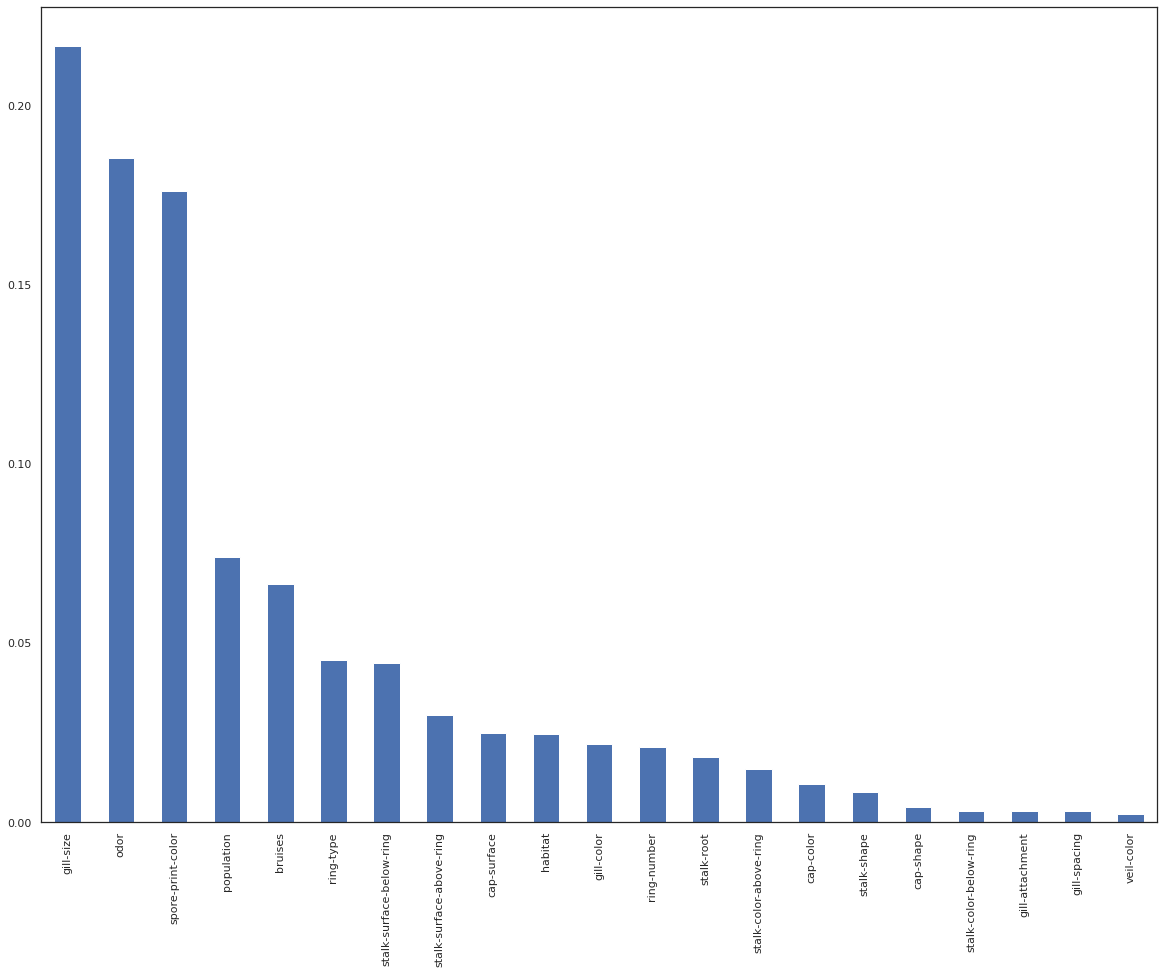

In [ ]:
feature_imp.plot(kind='bar',figsize=(20,15))

In [ ]:
#enregistrer le modèle sur le disque
filename = '/content/Drive/MyDrive/mushroom classifier model/finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [ ]:
#maintenant nous allons essayer notre modèle enregistré sur un autre ensemble 


loaded_model = pickle.load(open(filename, 'rb'))


In [ ]:
prediction_loaded_model = model.predict(X_test)

In [ ]:
print ("Accuracy = ", metrics.accuracy_score(y_test, prediction_loaded_model))

Accuracy =  1.0


In [ ]:
#Matrice de confusion 
cm = metrics.confusion_matrix(y_test,prediction_test)
print(cm)

[[843   0]
 [  0 782]]
